In [53]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import peak_util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
predicted = '/scr-ssd/coconutrubenasmr/regnet/ckpt/exp30/ASMR_Addictive_Tapping_1_Hr_No_Talking-27-of-365.npy'
real = '/scr-ssd/coconutrubenasmr/regnet/ckpt/exp30/ASMR_Addictive_Tapping_1_Hr_No_Talking-27-of-365_gt.npy'
p_arr = np.load(predicted)
r_arr = np.load(real)
print(p_arr.shape)

(80, 1720)


[0.00102814 0.00095729 0.00083707 ... 0.01998936 0.01497465 0.01260754]


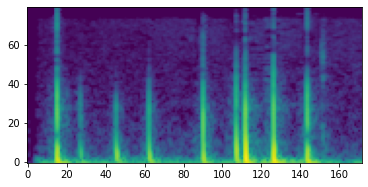

In [90]:
print(np.sum(np.exp(r_arr),axis=0))
height = np.max(np.exp(r_arr))*0.5
peaks0, _ = find_peaks(np.sum(np.exp(r_arr), axis=0), height=height, width=2)
_, peaks = peak_util.count_peaks(r_arr)
section = 1
plt.imshow(r_arr[:,(section-1)*172:section*172], origin='lower')

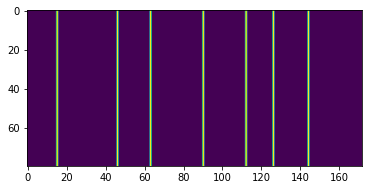

In [91]:
pimage = np.zeros(r_arr.shape)
pimage[:,peaks] = 1.
#pimage[:,peaks-1] = 1.
#pimage[:,peaks+1] = 1.
plt.imshow(pimage[:,(section-1)*172:section*172])

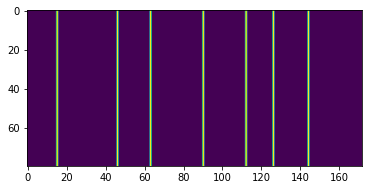

In [92]:
pimage = np.zeros(r_arr.shape)
pimage[:,peaks0] = 1.
#pimage[:,peaks-1] = 1.
#pimage[:,peaks+1] = 1.
plt.imshow(pimage[:,(section-1)*172:section*172])

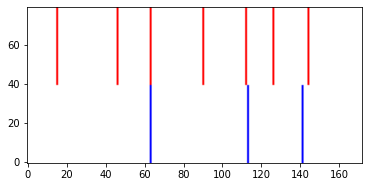

In [97]:
_, pred_peaks = peak_util.count_peaks(p_arr)
_, gt_peaks = peak_util.count_peaks(r_arr)
h, w = r_arr.shape
plt.imshow(peak_util.peaks_diff_image(pred_peaks, gt_peaks, h, w)[:,(section-1)*172:section*172], origin='lower')